In [2]:
import numpy as np 
import os
import sys
import scipy as sp
import math
import matplotlib.pyplot as plt 
import pandas as pd
import ezc3d
import csv
from itertools import cycle
import tensorflow as tf
from scipy.signal import find_peaks

In [3]:
# Load data from a CSV file
#csv_file = r'C:\Users\User\Desktop\test.csv' #Windows Directory

df = pd.read_excel("/Users/charlesarnold/Desktop/DB_test.xlsx", sheet_name="Sheet1") # mac pathname

print(df.head(10))

print(df.columns)




        C7x       C7y       C7z     CLAVx     CLAVy     CLAVz     LANKx  \
0  0.003564  0.057339  0.183473  0.217727 -0.001984  0.361450  0.120232   
1  0.004078  0.057466  0.183530  0.217929 -0.001402  0.361887  0.120622   
2  0.004623  0.057468  0.183577  0.218045 -0.000918  0.362332  0.121025   
3  0.005033  0.057508  0.183607  0.218143 -0.000622  0.362597  0.121295   
4  0.005644  0.057643  0.183612  0.218314 -0.000108  0.362998  0.121754   
5  0.006229  0.057750  0.183642  0.218473  0.000376  0.363416  0.122260   
6  0.006757  0.057893  0.183672  0.218639  0.000858  0.363775  0.122748   
7  0.007107  0.057988  0.183707  0.218754  0.001155  0.364019  0.123029   
8  0.007624  0.058120  0.183716  0.218917  0.001588  0.364414  0.123381   
9  0.008101  0.058222  0.183715  0.219080  0.001996  0.364731  0.123674   

      LANKy     LANKz     LASIx  ...     RWRAz     RWRBx     RWRBy     RWRBz  \
0  0.257619  0.323177  0.109617  ...  1.093330  1.518690  0.719840  0.413118   
1  0.257261  0

In [4]:
# Assuming data.T is defined

variable_names = [
    'C7', 'CLAV', 'LANK', 'LASI', 'LBHD', 'LELB', 'LFHD', 'LFIN', 'LFRM', 'LHEE',
    'LKNE', 'LMANK', 'LMELB', 'LMKNE', 'LPSI', 'LSHO', 'LTHI', 'LTIB', 'LTOE', 'LUPA',
    'LWRA', 'LWRB', 'RANK', 'RASI', 'RBAK', 'RBHD', 'RELB', 'RFHD', 'RFIN', 'RFRM',
    'RHEE', 'RKNE', 'RMANK', 'RMELB', 'RMKNE', 'RPSI', 'RSHO', 'RTHI', 'RTIB', 'RTOE',
    'RUPA', 'RWRA', 'RWRB', 'STRN', 'T10'
]

# Unpack the variables as separate numpy arrays
data_arrays = [
    (
        np.array(eval(variable_name + 'x')),
        np.array(eval(variable_name + 'y')),
        np.array(eval(variable_name + 'z'))
    )
    for variable_name in variable_names
]

# Assign the values of XYZ data arrays to the variables
for variable_name, data_array in zip(variable_names, data_arrays):
    exec(f'{variable_name} = np.array(data_array).T')

# Example usage
print("C7:", C7.shape)
print("CLAV:", CLAV)

sacrum = (RPSI + LPSI) / 2

C7: (726, 3)
CLAV: [[ 2.17727020e-01 -1.98362600e-03  3.61449987e-01]
 [ 2.17928886e-01 -1.40220800e-03  3.61887008e-01]
 [ 2.18044668e-01 -9.17946000e-04  3.62332135e-01]
 ...
 [ 1.26692164e+00  1.41793919e+00  9.90942061e-01]
 [ 1.26654315e+00  1.41616583e+00  9.88975167e-01]
 [ 1.26628244e+00  1.41445446e+00  9.87010121e-01]]


In [5]:
def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)

In [19]:
#make unit vectors for each body marker
C7_unit = unit_vector(C7)
CLAV_unit = unit_vector(CLAV)
LANK_unit = unit_vector(LANK)
LASI_unit = unit_vector(LASI)
LBHD_unit = unit_vector(LBHD)
LELB_unit = unit_vector(LELB)
LFHD_unit = unit_vector(LFHD)
LFIN_unit = unit_vector(LFIN)
LFRM_unit = unit_vector(LFRM)
LHEE_unit = unit_vector(LHEE)
LKNE_unit = unit_vector(LKNE)
LMANK_unit = unit_vector(LMANK)
LMELB_unit = unit_vector(LMELB)
LMKNE_unit = unit_vector(LMKNE)
LPSI_unit = unit_vector(LPSI)
LSHO_unit = unit_vector(LSHO)
LTHI_unit = unit_vector(LTHI)
LTIB_unit = unit_vector(LTIB)
LTOE_unit = unit_vector(LTOE)
LUPA_unit = unit_vector(LUPA)
LWRA_unit = unit_vector(LWRA)
LWRB_unit = unit_vector(LWRB)
RANK_unit = unit_vector(RANK)
RASI_unit = unit_vector(RASI)
RBAK_unit = unit_vector(RBAK)
RBHD_unit = unit_vector(RBHD)
RELB_unit = unit_vector(RELB)
RFHD_unit = unit_vector(RFHD)
RFIN_unit = unit_vector(RFIN)
RFRM_unit = unit_vector(RFRM)
RHEE_unit = unit_vector(RHEE)
RKNE_unit = unit_vector(RKNE)
RMANK_unit = unit_vector(RMANK)
RMELB_unit = unit_vector(RMELB)
RMKNE_unit = unit_vector(RMKNE)
RPSI_unit = unit_vector(RPSI)
RSHO_unit = unit_vector(RSHO)
RTHI_unit = unit_vector(RTHI)
RTIB_unit = unit_vector(RTIB)
RTOE_unit = unit_vector(RTOE)
RUPA_unit = unit_vector(RUPA)
RWRA_unit = unit_vector(RWRA)
RWRB_unit = unit_vector(RWRB)
STRN_unit = unit_vector(STRN)
T10_unit = unit_vector(T10)

print(C7_unit.shape)
vectors = np.array([3,3,3])
unitvectors = vectors/np.linalg.norm(vectors)


(726, 3)
0.9999999999999999


In [30]:
#pelvis rotation matrix
def pelvis_rotation_matrix(Rasis,Lasis,sacrum): 
    RASISx, RASISy, RASISz = Rasis.T
    V1 = []
    V3 = []

    #unit vector function
    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)

    #v3 and extra vector unit vector
    V2 = np.array(Lasis-Rasis)
    temp = np.array(Lasis-sacrum)

    for i in range(len(RASISx)):
        V3.append(np.cross(temp[i], V2[i]))
        V1.append(np.cross(V2[i], V3[i]))

    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3))

    #test if individual vectors are unit vectors
    '''x_u= []
    for i in range(len(v3)):
        x_u.append(np.linalg.norm(v3[i]))
    x = np.array(x_u)
    print(x)'''
   
    #print([v1.shape,v2.shape,v3.shape])
  
    pelvis = np.array([v1.T,v2.T,v3.T]).T
    print(pelvis.shape)
    print(pelvis)
    return pelvis

print(RASI.shape,LASI.shape,T10.shape)
pelvis_rot = pelvis_rotation_matrix(RASI,LASI,sacrum)
print(pelvis_rot.shape)

(726, 3) (726, 3) (726, 3)
(726, 3, 3)
[[[-0.97472771  0.21951721  0.0414497 ]
  [ 0.20247325  0.78969537  0.57912503]
  [ 0.09439527  0.57288167 -0.81418433]]

 [[-0.97495607  0.21829925  0.0424983 ]
  [ 0.20227761  0.79098822  0.57742654]
  [ 0.09243613  0.57156196 -0.81533581]]

 [[-0.9751317   0.21731354  0.04350859]
  [ 0.20223714  0.79220514  0.57577005]
  [ 0.09065489  0.57025068 -0.81645322]]

 ...

 [[-0.7217298   0.63300561 -0.28001785]
  [ 0.1407164   0.53028207  0.83606209]
  [ 0.67772044  0.56400782 -0.47179464]]

 [[-0.72261145  0.63287555 -0.278031  ]
  [ 0.14186514  0.52942678  0.83640993]
  [ 0.67654045  0.56495648 -0.47235283]]

 [[-0.7233793   0.63282103 -0.27615202]
  [ 0.14289357  0.52851253  0.83681296]
  [ 0.67550264  0.56587283 -0.47274108]]]
(726, 3, 3)


In [37]:
#hip joint centers
def hip_jc(RASIS, LASIS, pelvis):
    RASISx, RASISy, RASISz = RASIS.T
    hip_origin = (RASIS + LASIS) / 2
    breth = unit_vector(RASIS - LASIS)
    v3x, v3y, v3z = breth.T
    ASISB = np.array([0.24 * v3x, -0.21 * v3y, 0.32 * v3z]).T

    # Transpose pelvis_rot to shape (726, 3, 3) to match ASISB shape for einsum
   

    hip_jc = hip_origin + tf.einsum('ijk,ik->ij', pelvis, ASISB)
    print("hip_jc: ", hip_jc)
    return hip_jc


In [38]:
hip_centers = np.array(hip_jc(RASI, LASI, pelvis_rot))
print("Shape of hip_jc:", hip_centers)

hip_jc:  tf.Tensor(
[[0.12566711 0.02884243 0.16605641]
 [0.12562491 0.03028722 0.16674052]
 [0.12558887 0.03166293 0.16736394]
 ...
 [0.89725423 0.61755685 0.85886591]
 [0.89727531 0.61617622 0.85921069]
 [0.89740564 0.61482544 0.85958246]], shape=(726, 3), dtype=float64)
Shape of hip_jc: [[0.12566711 0.02884243 0.16605641]
 [0.12562491 0.03028722 0.16674052]
 [0.12558887 0.03166293 0.16736394]
 ...
 [0.89725423 0.61755685 0.85886591]
 [0.89727531 0.61617622 0.85921069]
 [0.89740564 0.61482544 0.85958246]]


data type of hip_jc: <class 'numpy.ndarray'>
hjcx:  <class 'numpy.ndarray'>


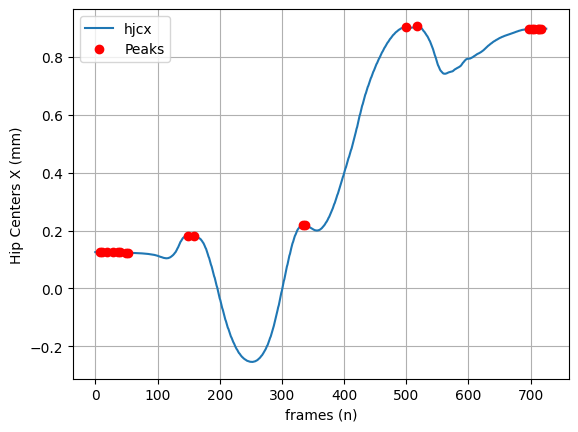

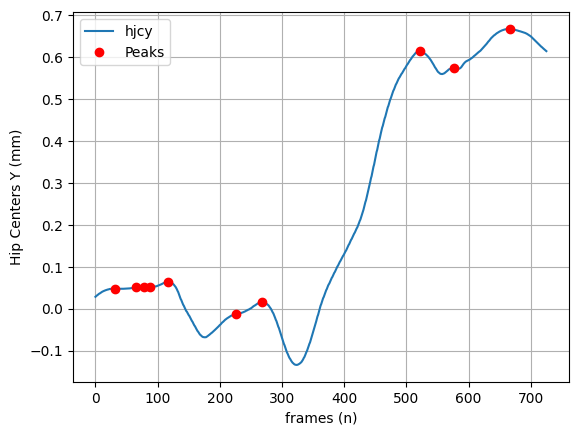

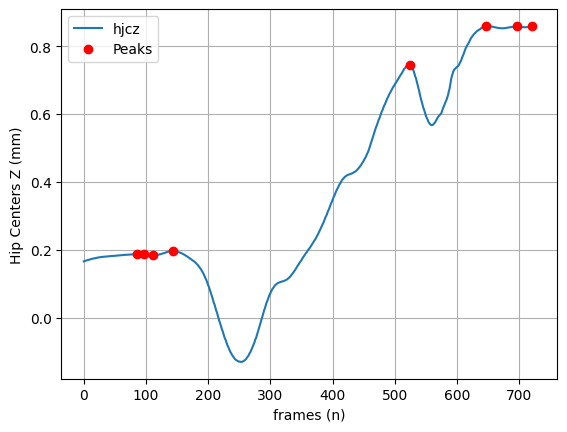

 
hjcx peaks 0 =  (7.0, 0.1254347541098203)
hjcx peaks 1 =  (10.0, 0.12539099410511115)
hjcx peaks 2 =  (18.0, 0.12525304789170802)
hjcx peaks 3 =  (28.0, 0.12532342846043942)
hjcx peaks 4 =  (36.0, 0.12523419634903732)
hjcx peaks 5 =  (39.0, 0.12502777426642306)
hjcx peaks 6 =  (49.0, 0.12401967783375287)
hjcx peaks 7 =  (53.0, 0.12355812586789959)
hjcx peaks 8 =  (149.0, 0.18247162383874604)
hjcx peaks 9 =  (158.0, 0.18000563086437105)
hjcx peaks 10 =  (334.0, 0.22047809427435933)
hjcx peaks 11 =  (337.0, 0.22066675432474256)
hjcx peaks 12 =  (499.0, 0.9023294783540042)
hjcx peaks 13 =  (518.0, 0.9069311466055268)
hjcx peaks 14 =  (698.0, 0.8960757770527292)
hjcx peaks 15 =  (702.0, 0.8961170571703155)
hjcx peaks 16 =  (705.0, 0.8959114087704827)
hjcx peaks 17 =  (711.0, 0.8957194635140636)
hjcx peaks 18 =  (714.0, 0.8958363136296305)
hjcx peaks 19 =  (716.0, 0.8960777008864202)
 
hjcy peaks 0 =  (7.0, 0.03696086312349477)
hjcy peaks 1 =  (10.0, 0.04013655609739453)
hjcy peaks 2 =  (

In [39]:
print("data type of hip_jc:", type(hip_centers))
# Evaluate the tensor using a TensorFlow session


# Unpack the result and transpose it
hjcx, hjcy, hjcz = hip_centers.T

print("hjcx: ", type(hjcx))  


t = np.linspace(0, 725, 726)

peaks1, _ = find_peaks(hjcx)
peaks2, _ = find_peaks(hjcy)
peaks3, _ = find_peaks(hjcz)

# Plot hjcx, hjcy, and hjcz here
plt.figure()
plt.plot(frames, hjcx, label='hjcx')
plt.plot(frames[peaks1], hjcx[peaks1], 'o', color='red', label='Peaks')

plt.xlabel('frames (n)')
plt.ylabel('Hip Centers X (mm)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(frames, hjcy, label='hjcy')
plt.plot(frames[peaks2], hjcy[peaks2], 'o', color='red', label='Peaks')

plt.xlabel('frames (n)')
plt.ylabel('Hip Centers Y (mm)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(frames, hjcz, label='hjcz')
plt.plot(frames[peaks3], hjcz[peaks3], 'o', color='red', label='Peaks')

plt.xlabel('frames (n)')
plt.ylabel('Hip Centers Z (mm)')
plt.legend()
plt.grid(True)
plt.show()

hip = np.array([hjcx, hjcy, hjcz])
hip_str = ('hjcx', 'hjcy', 'hjcz')

for i in range(len(hip)):
    print(" ")
    for j in range(len(t[peaks1])):
        print(rf"{hip_str[i]} peaks {j} = ", (t[peaks1][j], hip[i][peaks1][j]))


In [40]:
#Right local coordinate system: (joint center, lateral marker, medial marker)
def Right_local_coord(jc,lat,med):

    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)
        
    jc_local = np.array(lat+med)/2
    jcx,jcy,jcz = jc.T
    V3 = np.array(jc-jc_local) # +Z axis
    temp = np.array(jc-lat) # temperary vector in +ZY plane

    V1 = []
    V2 = []

    for i in range(len(jcx)):
        V1.append(np.cross(temp[i],V3[i])) # +X axis
        V2.append(np.cross(V3[i],V1[i])) # +Y axis
    
    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3))
    
    #test unit vector
    #print(np.linalg.norm(v1[0]))

    Rlocal_coord = np.array([v1.T,v2.T,v3.T])

    return Rlocal_coord.T
    
Right_Thigh = Right_local_coord(hip_centers,RKNE,RMKNE)

print(Right_Thigh)
    

[[[ 0.62657947  0.54075991 -0.56122802]
  [ 0.13628797 -0.78504651 -0.60425786]
  [-0.76734853  0.30212694 -0.5655931 ]]

 [[ 0.62668585  0.54016819 -0.56167889]
  [ 0.13577521 -0.78543618 -0.60386679]
  [-0.76735255  0.3021727  -0.56556319]]

 [[ 0.62685536  0.5395141  -0.56211821]
  [ 0.13519732 -0.78583954 -0.60347155]
  [-0.76731613  0.3022925  -0.56554859]]

 ...

 [[ 0.66406134  0.68840916 -0.29174538]
  [ 0.32428377 -0.61677637 -0.71723563]
  [-0.67369323  0.38168017 -0.63281726]]

 [[ 0.66281806  0.68989166 -0.29106996]
  [ 0.32215872 -0.61365316 -0.72086306]
  [-0.67593342  0.38403033 -0.62899501]]

 [[ 0.66173294  0.69122328 -0.29037889]
  [ 0.31991587 -0.61060177 -0.72444415]
  [-0.67805852  0.38649174 -0.6251886 ]]]


In [172]:
#Left local coordinate system: (joint center, lateral marker, medial marker)
def Left_local_coord(jc,lat,med):

    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)
        
    jc_local = np.array(lat+med)/2
    jcx,jcy,jcz = jc.T
    V3 = np.array(jc - jc_local) # +Z axis
    temp = np.array(jc - med) # temperary vector in +ZY plane

    V1 = []
    V2 = []

    for i in range(len(jcx)):
        V1.append(np.cross(temp[i],V3[i])) # +X axis
        V2.append(np.cross(V3[i],V1[i])) # +Y axis
    
    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3))
    
    #test unit vector
    #print(np.linalg.norm(v1[0]))

    Left_local_coord = np.array([v1.T,v2.T,v3.T])

    return Left_local_coord.T

Left_Thigh = Left_local_coord(hip_centers,LKNE,LMKNE)
print(Left_Thigh)


[[[ 0.68248869 -0.45774226  0.56980805]
  [-0.04703817  0.75047799  0.65921938]
  [-0.72938097 -0.4767125   0.49066138]]

 [[ 0.68838665 -0.45652822  0.56365398]
  [-0.05118267  0.7445753   0.6655734 ]
  [-0.72353587 -0.48702116  0.48918936]]

 [[ 0.69461524 -0.45482307  0.55735594]
  [-0.05556207  0.73853743  0.67191913]
  [-0.71723255 -0.49769312  0.48772844]]

 ...

 [[-0.79210159  0.50533727 -0.34235846]
  [ 0.48528835  0.18116907 -0.85537886]
  [-0.37023005 -0.84368952 -0.3887386 ]]

 [[-0.82726407  0.44045836 -0.34875579]
  [ 0.47711549  0.2230253  -0.85007089]
  [-0.29663947 -0.86962989 -0.39465033]]

 [[-0.85671299  0.37438493 -0.35479398]
  [ 0.46522318  0.2638348  -0.8449607 ]
  [-0.22273355 -0.8889472  -0.40020325]]]


In [174]:
#Right foot coordinate system: (toe, lateral marker, medial marker, heel)
def Right_foot_coord(toe, lat, med, heel):
    
    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)
        
    jc_local = np.array(lat+med)/2
    jcx,jcy,jcz = jc_local.T
    V1 = np.array(toe-heel) # +X axis
    temp = np.array(jc_local-heel) # temporary vector in +XZ plane

    V2 = []
    V3 = []

    for i in range(len(jcx)):
        V2.append(np.cross(temp[i], V1[i])) # +Y axis
        V3.append(np.cross(V1[i], V2[i])) # +Z axis
    
    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3))
    
    #test unit vector
    #print(np.linalg.norm(v1[0]))

    Rfoot_coord = np.array([v1.T,v2.T,v3.T])

    return Rfoot_coord.T


In [175]:
#Left foot coordinate system: (toe, lateral marker, medial marker, heel)
def Left_foot_coord(toe, lat, med, heel):
    
    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)
        
    jc_local = np.array(lat+med)/2
    jcx,jcy,jcz = jc_local.T
    V1 = np.array(toe-heel) # +X axis
    temp = np.array(jc_local-heel) # temporary vector in +XZ plane

    V2 = []
    V3 = []

    for i in range(len(jcx)):
        V2.append(np.cross(temp[i], V1[i])) # +Y axis
        V3.append(np.cross(V1[i], V2[i])) # +Z axis
    
    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3))
    
    #test unit vector
    #print(np.linalg.norm(v1[0]))

    Lfoot_coord = np.array([v1.T,v2.T,v3.T])

    return Lfoot_coord.T

In [176]:
def trunk_rotation_matrix(C7,STRN,T10): 
    C7x, C7y, C7z = C7.T
    V1 = []
    V2 = []

    #unit vector function
    def unit_vector(vector):
        v_unit = []
        for i in range(len(vector)):
            v_unit.append(vector[i] / np.linalg.norm(vector[i]))
        return np.array(v_unit)

    #v3 and extra vector unit vector
    V3 = np.array(C7-T10)
    temp = np.array(T10-STRN)
    print(np.linalg.norm(temp[0]))
    for i in range(len(C7x)):
        V2.append(np.cross(temp[i], V3[i]))
        V1.append(np.cross(V2[i],V3[i]))
    
    v1 = unit_vector(np.array(V1))
    v2 = unit_vector(np.array(V2))
    v3 = unit_vector(np.array(V3)) 
   
    #print([v1.shape,v2.shape,v3.shape])
  
    trunk = np.array([v1.T,v2.T,v3.T]).T
    print(trunk.shape)
    print(trunk)
    return trunk


In [177]:
#all lower body segment coordinate systems
Right_humerus = Right_local_coord(RSHO,RELB, RMELB)
Right_elbow = Right_local_coord(RELB,RELB,RMELB)
Right_thigh = Right_local_coord(hip_centers,RKNE,RMKNE)
Left_thigh = Left_local_coord(hip_centers,LKNE,LMKNE)
Right_shank = Right_local_coord(RANK,RTIB,RMANK)
Left_shank = Left_local_coord(LANK,LTIB,LMANK)
Right_Foot = Right_foot_coord(RTOE,RANK,RMANK,RHEE)
Left_Foot = Left_foot_coord(LTOE,LANK,LMANK,LHEE)


trunk = trunk_rotation_matrix(C7, STRN, T10)


#print(Right_thigh.shape)


1.0453472454119073
(726, 3, 3)
[[[-0.81785836  0.06615724 -0.57160381]
  [ 0.48189131  0.62162074 -0.61755034]
  [ 0.31446536 -0.78051962 -0.54027832]]

 [[-0.81793315  0.06617924 -0.57149424]
  [ 0.48180779  0.62165125 -0.6175848 ]
  [ 0.31439881 -0.78049345 -0.54035484]]

 [[-0.81800912  0.06622058 -0.57138071]
  [ 0.48172356  0.62170119 -0.61760022]
  [ 0.31433023 -0.78045017 -0.54045726]]

 ...

 [[ 0.32376468 -0.4137684   0.85086553]
  [-0.03875944  0.89274887  0.44888435]
  [-0.9453434  -0.17831197  0.27300312]]

 [[ 0.32063104 -0.41264594  0.85259549]
  [-0.0328742   0.89472781  0.4454003 ]
  [-0.94663352 -0.17083756  0.2733121 ]]

 [[ 0.31781305 -0.41162239  0.85414394]
  [-0.02702259  0.89655177  0.4421139 ]
  [-0.94776825 -0.16359075  0.27381275]]]


/var/folders/vf/rk6hz5_949342ybpcqj8djbr0000gn/T/ipykernel_78871/3406578538.py:7: RuntimeWarning: invalid value encountered in divide
  v_unit.append(vector[i] / np.linalg.norm(vector[i]))


[[-0.89100031  0.20414317  0.40551698]
 [-0.32619149  0.33341511 -0.8845527 ]
 [-0.31578088 -0.92041291 -0.2304832 ]]
(3, 726)
(726,)


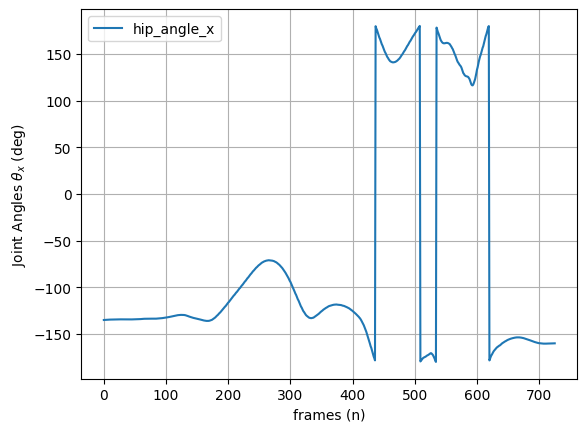

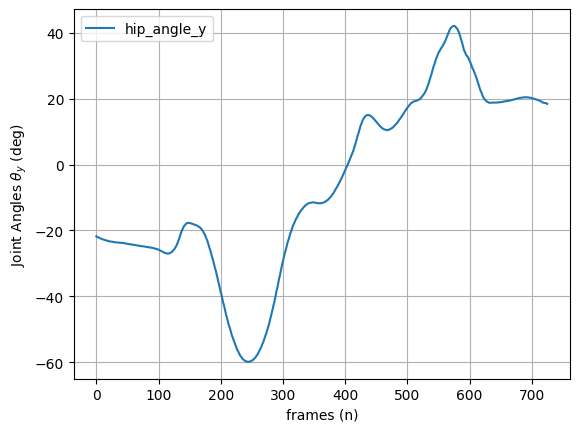

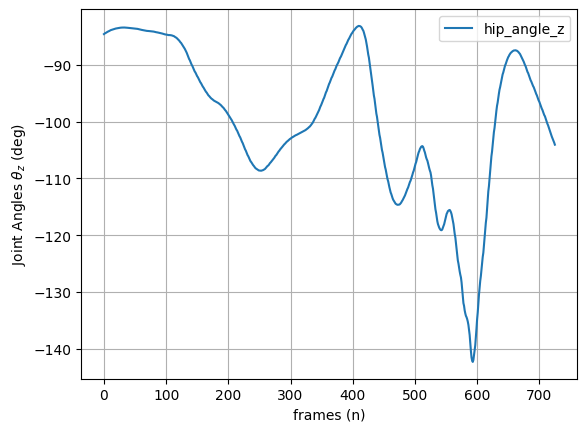

In [178]:
#angle function
def angles(rot1,rot2):
    alpha = [] #ang_x
    beta = [] #ang_y
    gamma = [] #ang_z

    for i in range(len(rot1)):
        C1 = np.array(rot1[i].T@rot2[i]).T #C matrix used for calculating joint angles
        alpha.append(math.degrees(np.arctan2(C1[1,0],C1[0,0])))
        beta.append(math.degrees(np.arctan2(-C1[2,0], np.sqrt(C1[0,0]**2+C1[1,0]**2))))
        gamma.append(math.degrees(np.arctan2(C1[2,1],C1[2,2])))

    print(C1)
    alpha = np.array(alpha)
    beta = np.array(beta)
    gamma = np.array(gamma)



    return alpha,beta,gamma   

hip_angles = np.array(angles(pelvis_rot,Right_thigh))

print(hip_angles.shape)

hip_angle_x,hip_angle_y,hip_angle_z = hip_angles

print(hip_angle_x.shape)
plt.figure()
plt.plot(frames, hip_angle_x, label='hip_angle_x')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{x}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(frames, hip_angle_y, label='hip_angle_y')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{y}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(frames, hip_angle_z, label='hip_angle_z')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{z}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

[[-0.87398068 -0.3494793   0.33767142]
 [ 0.31536462  0.12078398  0.94125256]
 [-0.36973358  0.92912618  0.00465054]]
(726,)


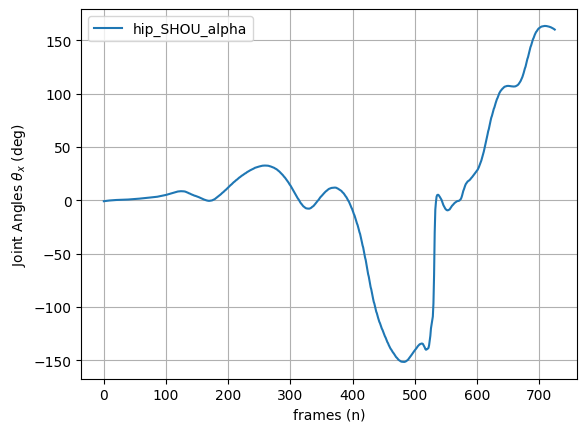

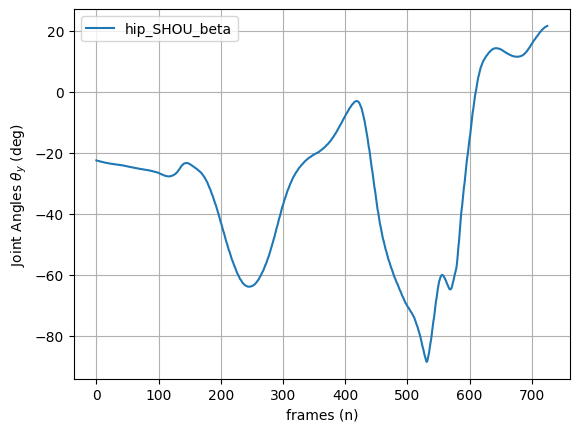

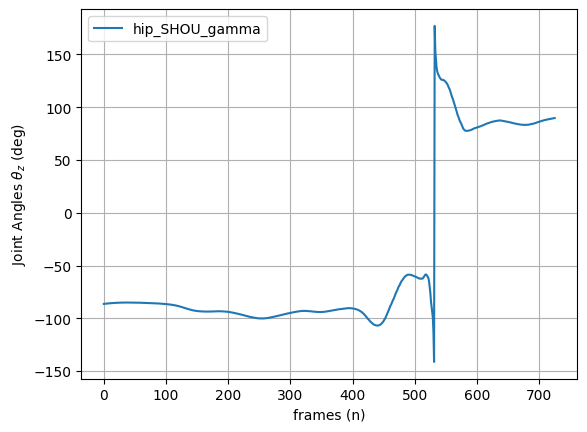

In [185]:

spring_angles = np.array(angles(pelvis_rot, trunk))

spring_angle_alpha, spring_angle_beta, spring_angle_gamma = spring_angles

print(spring_angle_alpha.shape)
plt.figure()
plt.plot(frames, spring_angle_alpha, label='hip_SHOU_alpha')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{x}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(frames, spring_angle_beta, label='hip_SHOU_beta')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{y}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(frames, spring_angle_gamma, label='hip_SHOU_gamma')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{z}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

[[ 0.36209266 -0.31292687  0.87804651]
 [ 0.63384326  0.77333078  0.01422019]
 [-0.68347028  0.55139484  0.47836399]]
(726,)


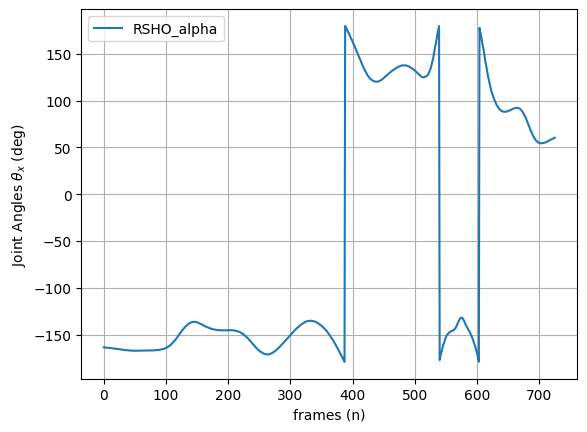

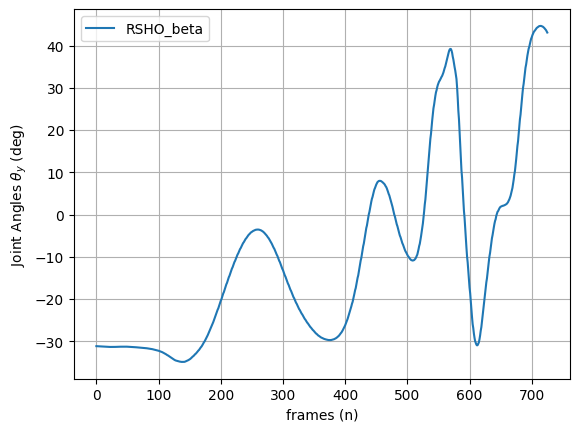

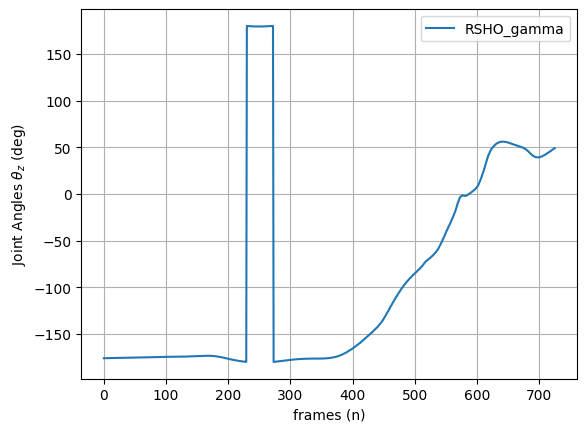

In [186]:
Right_shoulder_angle = np.array(angles(trunk, Right_humerus,))

RSHO_alpha, RSHO_beta, RSHO_gamma = Right_shoulder_angle

print(RSHO_alpha.shape)
plt.figure()
plt.plot(frames, RSHO_alpha, label='RSHO_alpha')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{x}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(frames, RSHO_beta, label='RSHO_beta')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{y}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(frames, RSHO_gamma, label='RSHO_gamma')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{z}$ (deg)') #($^{\circ}$)')
plt.legend()
plt.grid(True)
plt.show()

In [181]:
def rk4_slope(t, h, derivative_func):
    k1 = h * derivative_func(t, 0)
    k2 = h * derivative_func(t + h/2, 0 + k1/2)
    k3 = h * derivative_func(t + h/2, 0 + k2/2)
    k4 = h * derivative_func(t + h, 0 + k3)
    slope = (k1 + 2*k2 + 2*k3 + k4) / 6
    return slope

def derivative(t, y):
    # Replace this with the actual derivative function if available
    # For example, dy/dt = 2 * t + y
    return 2 * t + y

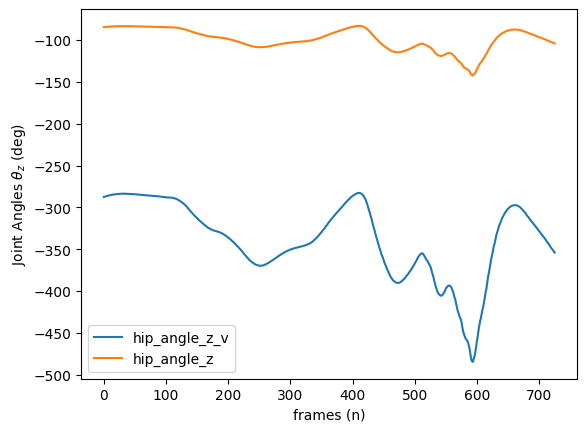

In [184]:
def velocity(data):
    data = np.array(data)

    # Check if data is 1D or 2D (multiple frames with x, y, z coordinates)
    if len(data.shape) == 2 and data.shape[1] == 3:
        x, y, z = data.T
        h = x[1] - x[0]  # Assuming uniform time intervals meaning frame1-frame0 = 1 :) dt = 1
        vx = rk4_slope(x, h, derivative)
        vy = rk4_slope(y, h, derivative)
        vz = rk4_slope(z, h, derivative)
        data_v = np.array([vx, vy, vz]).T
    elif len(data.shape) == 1:
        h = 1  # Assume time intervals of 1 (since we only have a single dimension)
        data_v = rk4_slope(data, h, derivative)
    else:
        raise ValueError("Invalid data shape. Expected (N, 3) or (N,)")

    return data_v

#test :D
Right_Thigh_v = velocity(RTHI)
hip_angle_z_v = velocity(hip_angle_z)


plt.figure()
plt.plot(frames, hip_angle_z_v, label='hip_angle_z_v')
plt.plot(frames, hip_angle_z, label='hip_angle_z')
plt.xlabel('frames (n)')
plt.ylabel(r'Joint Angles $\theta_{z}$ (deg)') #($^{\circ}$)')  
plt.legend()


In [52]:
#Velocities
# Initialize an empty dictionary to store the velocity data for each marker
velocity_data = {}

# Unpack the variables as separate numpy arrays and calculate velocity for each marker
for variable_name in variable_names:
    x = np.array(eval(variable_name + 'x'))  # Replace 'eval' with the actual variable reference
    y = np.array(eval(variable_name + 'y'))
    z = np.array(eval(variable_name + 'z'))
    marker_data = np.column_stack((x, y, z))
    
    # Calculate the velocity for each marker
    vx, vy, vz = velocity(marker_data).T

    marker_velocity = np.column_stack((vx, vy, vz))
    
    # Store the velocity data for the current marker in the dictionary
    velocity_data[variable_name] = marker_velocity

print(velocity_data)



{'C7': array([[3.92524262e-06, 5.91677179e-05, 1.88745210e-04],
       [4.45277542e-06, 5.92986241e-05, 1.88803457e-04],
       [5.01242457e-06, 5.93007249e-05, 1.88852059e-04],
       ...,
       [1.48908029e-03, 1.52283102e-03, 1.47915673e-03],
       [1.48621208e-03, 1.52137800e-03, 1.47928568e-03],
       [1.48372718e-03, 1.52001082e-03, 1.47948615e-03]]), 'CLAV': array([[ 8.79529908e-05, -7.60181506e-07,  1.45984409e-04],
       [ 8.80344988e-05, -5.25420760e-07,  1.46160866e-04],
       [ 8.80812484e-05, -3.29888959e-07,  1.46340596e-04],
       ...,
       [ 5.11589190e-04,  5.72565961e-04,  4.00156156e-04],
       [ 5.11436367e-04,  5.71849928e-04,  3.99361978e-04],
       [ 5.11331099e-04,  5.71158923e-04,  3.98568546e-04]]), 'LANK': array([[9.39300542e-05, 2.01088552e-04, 2.52221476e-04],
       [9.42341746e-05, 2.00808659e-04, 2.52292513e-04],
       [9.45482905e-05, 2.00525301e-04, 2.52356623e-04],
       ...,
       [1.20316450e-03, 8.21671121e-04, 7.46307917e-04],
       

array([[0.00356421, 0.05733887, 0.18347342],
       [0.00407773, 0.0574663 , 0.18353012],
       [0.00462251, 0.05746834, 0.18357743],
       ...,
       [1.44925797, 1.48211193, 1.43959808],
       [1.44646597, 1.48069751, 1.43972361],
       [1.44404709, 1.47936666, 1.43991876]])

In [ ]:
def separation(x,y,z): 
    w = np.array(x-y)
    
